In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

logs_dir = 'logs'

In [8]:
dataset_info = 'Active_Dmax_0.6_pDC50_6.0_test_split_0.1'
split_type = 'standard'
# experiment = 'cellsonehot_'
experiment = ''
model = 'best_model_n1'

# Load the data
metrics_dir = f'{model}_{experiment}{split_type}_{dataset_info}'
metrics = pd.read_csv(os.path.join(logs_dir, metrics_dir, metrics_dir, 'metrics.csv'))

In [9]:
def clean_metrics(df):
    # Assuming the dataframe is already stored in the variable df
    # Step 1: Remove rows where all values are nan
    df.dropna(how='all', inplace=True)

    # Step 2: Forward fill the nan values where appropriate
    df.fillna(method='bfill', inplace=True)

    # Step 3: Drop columns where all values are nan
    df.dropna(axis=1, how='all', inplace=True)

    return df

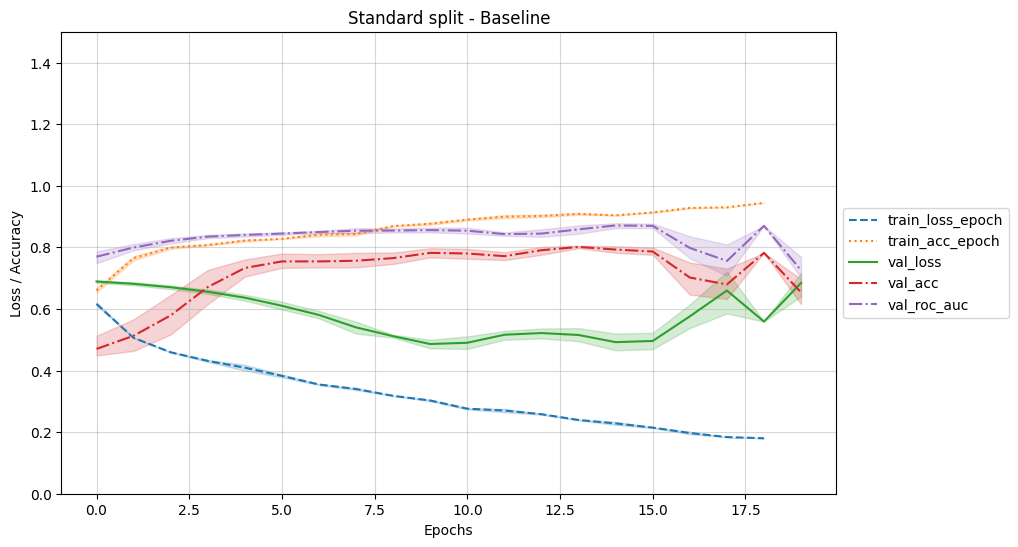

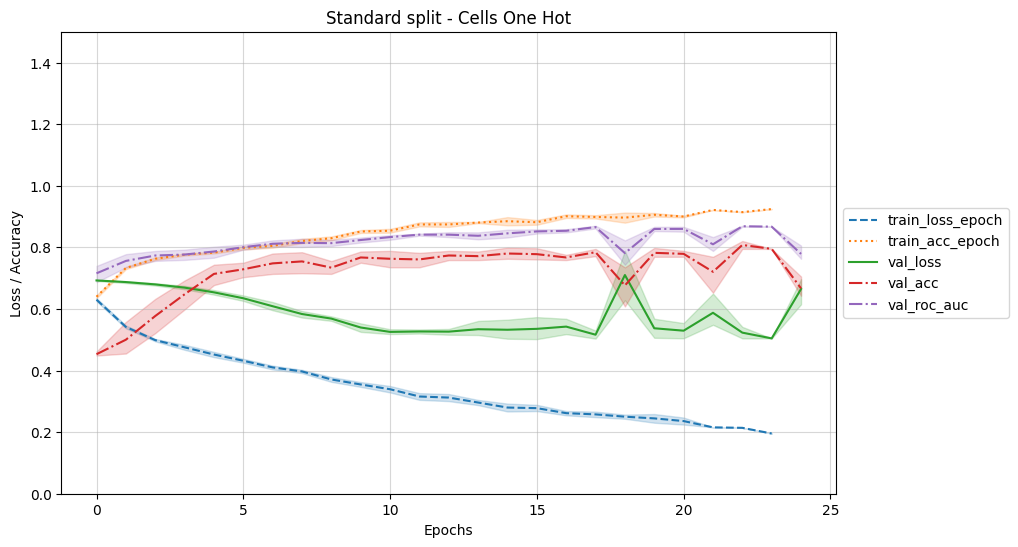

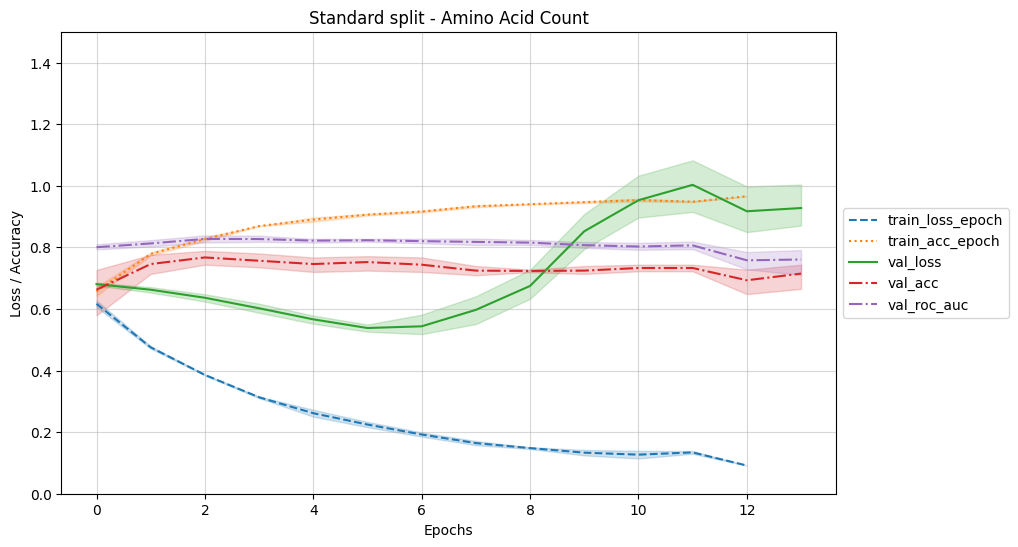

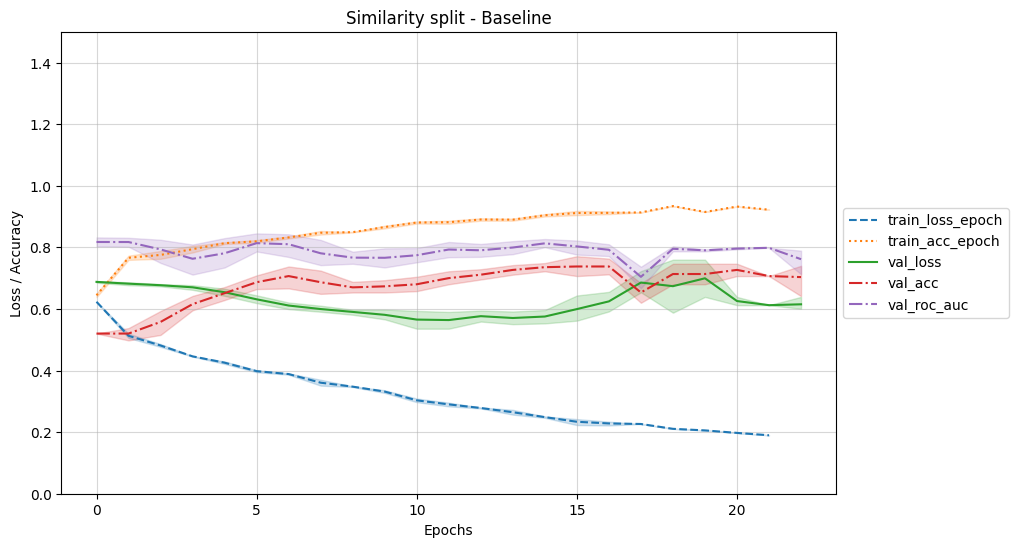

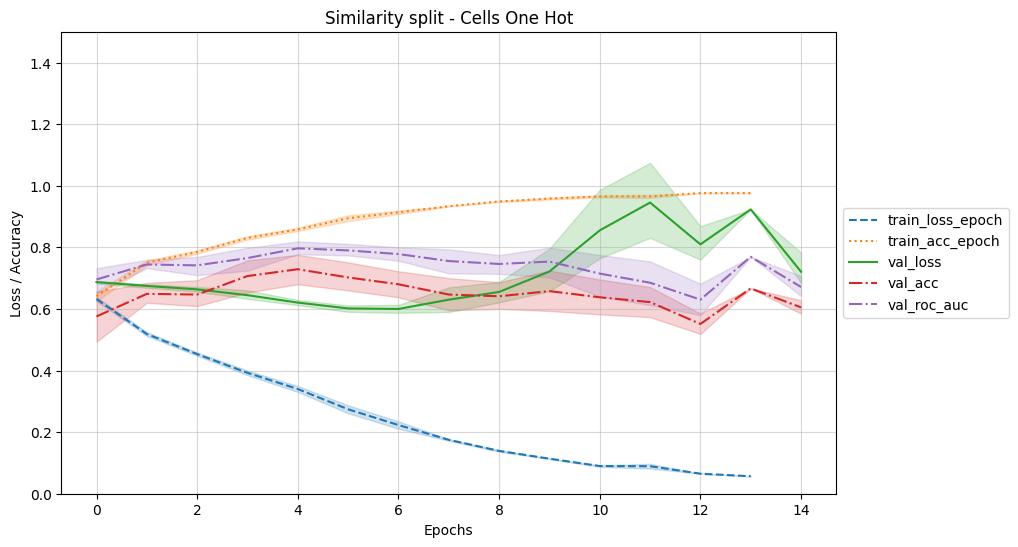

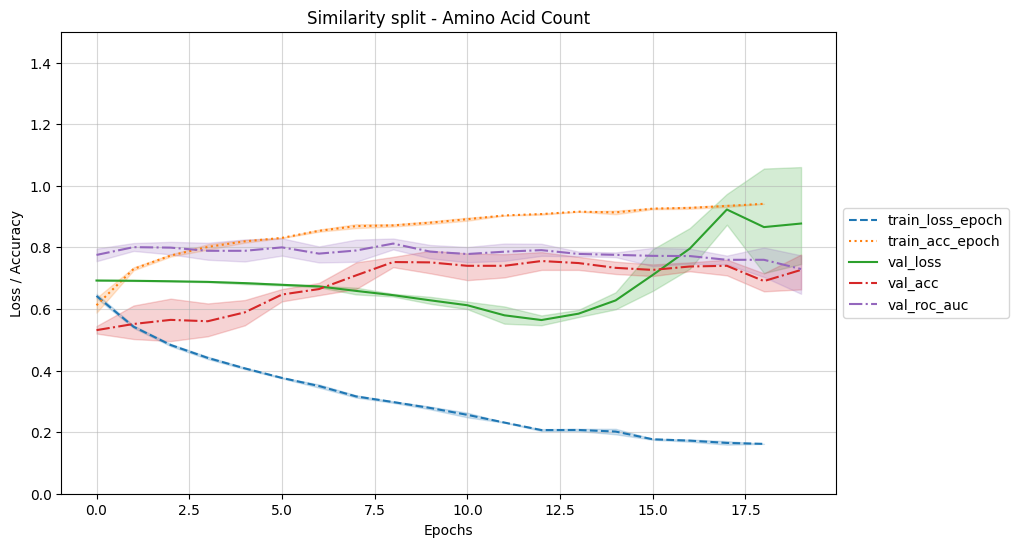

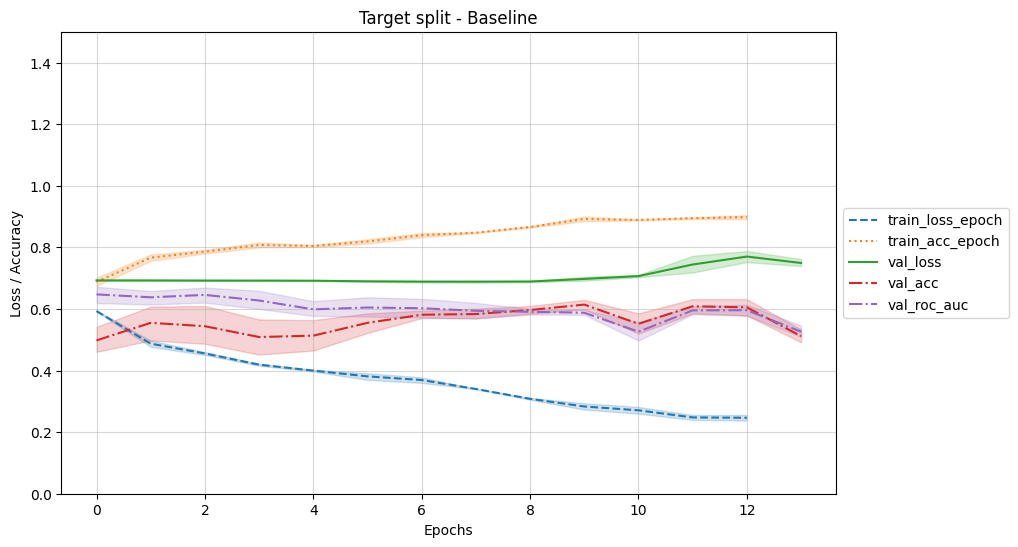

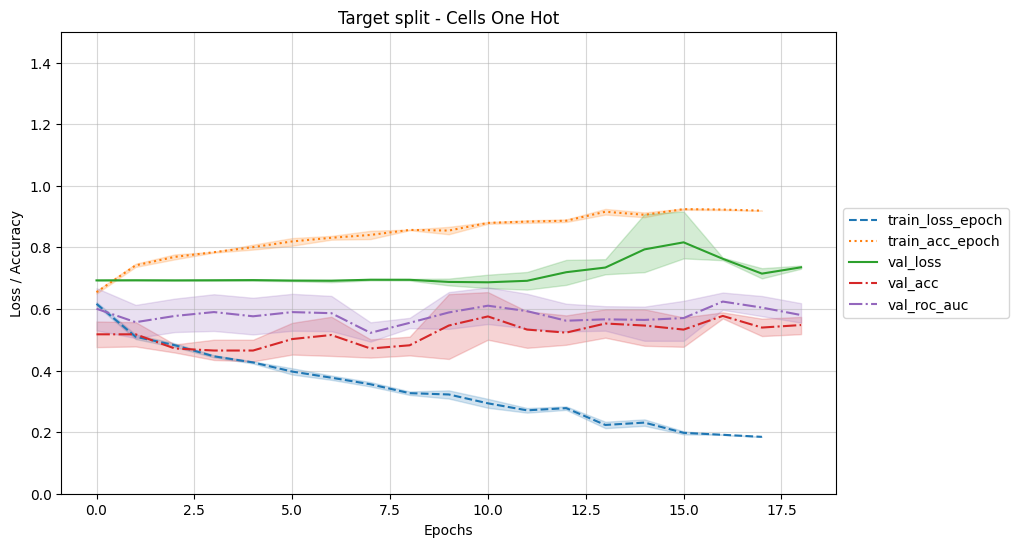

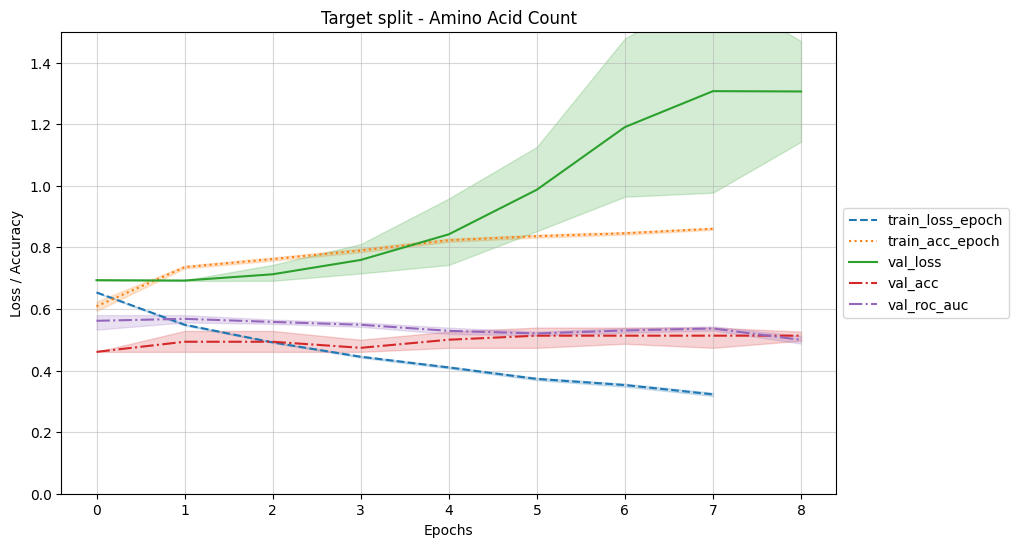

In [11]:
# Line plot of the train loss, validation loss, train accuracy and validation accuracy
for split_type in ['standard', 'similarity', 'target']:
    for experiment in ['', 'cellsonehot_', 'aminoacidcnt_']:
        if experiment == '':
            experiment_name = 'Baseline'
        elif experiment == 'cellsonehot_':
            experiment_name = 'Cells One Hot'
        elif experiment == 'aminoacidcnt_':
            experiment_name = 'Amino Acid Count'

        data = []
        plt.figure(figsize=(10, 6))

        for i in range(3):
            model = f'best_model_n{i}'

            metrics_dir = f'{model}_{experiment}{split_type}_{dataset_info}'
            metrics = pd.read_csv(os.path.join(logs_dir, metrics_dir, metrics_dir, 'metrics.csv'))
            metrics = clean_metrics(metrics)
            metrics['model'] = model
            metrics['experiment'] = experiment_name

            data.append(metrics)
        
        data = pd.concat(data, axis=0).reset_index(drop=True)
        sns.lineplot(data=data, x='epoch', y='train_loss_epoch', label='train_loss_epoch', linestyle='--')
        sns.lineplot(data=data, x='epoch', y='train_acc_epoch', label='train_acc_epoch', linestyle=':')
        sns.lineplot(data=data, x='epoch', y='val_loss', label='val_loss', linestyle='-')
        sns.lineplot(data=data, x='epoch', y='val_acc', label='val_acc', linestyle='-.')
        sns.lineplot(data=data, x='epoch', y='val_roc_auc', label='val_roc_auc', linestyle='-.')

        plt.grid(True, alpha=0.5)
        # Set the legend to the right of the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        plt.xlabel('Epochs')
        plt.ylabel('Loss / Accuracy')
        plt.title(f'{split_type.capitalize()} split - {experiment_name}')
        plt.ylim(0, 1.5)
        plt.show()